<center><h1>KLASIFIKASI DATA INDIAN LIVER PATIENT DENGAN METODE ARTIFICAL NEURAL NETWORK</h1></center>


<html>
    <img src="https://report.unsri.ac.id/index.php/public/image/show/f10001/i0003/j0003/3" width=200 align="center"><img>
</html>

<font size="3"><center><b>Azis Mulki Rafani</b> <font color="blue">09011281722034</font></center></br>
<center>Praktikum Kecerdasan Buatan <font color="blue"><i>(AI)</i></font></center>
<center>Sistem Komputer, Fakultas Ilmu Komputer </center>
<center>Universitas Sriwijaya </center>
<center>Email: <font color="blue"><u>azismulki1@gmail.com</u></font></center></font>

<html>
    <img src="https://akademik.unsri.ac.id/images/foto_mhs/2017/09011281722034.jpg" width=120 align="center"><img>
</html>

<font size="3"><center><b><font color="gray">Sumber Paper : <a href="https://www.academia.edu/38004630/Klasifikasi_Data_Indian_Liver_Patient_dengan_Metode_Logistic_Regression_k-_Nearest_Neighbors_Adaptive_Boosting_dan_Support_Vector_Machine" target="_blank">Klik Disini</a>
</font></b></center>

<center><b><font color="gray">Sumber Dataset : <a href="https://www.kaggle.com/uciml/indian-liver-patient-records" target="_blank">Klik Disini</a>
</font></b></center></font>

<h3>Abstrak</h3>
<br>&nbsp; &nbsp; &nbsp; &nbsp; Penyakit liver atau yang biasa disebut hepatitis merupakan peradangan hati yang disebabkan oleh infeksi virus, bakteri atau bahan-bahan beracun sehingga hati tidak dapat melakukan fungsinya dengan baik. Permasalahan yang dihadapi dalam penanganan kasus penyakit liver adalah keterlambatan dalam pendeteksian penyakit. Untuk menanggulangi masalah tersebut, peneliti mencari metode dari Artificial neural network yang nantinya dapat digunakan untuk mendeteksi penyakit.</br>

<h3>Pendahuluan</h3>
<br>&nbsp; &nbsp; &nbsp; &nbsp; Liver merupakan salah satu organ yang cukup besar dan penting pada tubuh kita. Liver berfungsi untuk pembentukan dan sekresi empedu, tempat penyimpanan glikogen, sintesa urea, metabolisme kolesterol dan lemak, sintesa dan sekresi endokrin, detoksifikasi berbagai macam obat dan racun, membersihkan bakteri dari darah, memproses beberapa hormon steroid dan reservoir vitamin D, serta katabolisme hemoglobin dari sel darah merah yang tidak terpakai lagi </br>

<html>
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRnl4r_8UVA5V1gD-aF3xw2QmWxuIXC7PT-8MWchHObveU7YU12" align="center"> <img>
 </html>

<div class="alert alert-success" role="alert">
<h3>IMPORT LIBRARY</h3><br>   
</div>

In [1]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu

import scikitplot as skplt

import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


<div class="alert alert-info" role="alert">
    <h3>IMPORT PACKAGES</h3><br>

Berikut ini adalah paket-paket yang digunakan antara lain :

<ul type='a'>
           <li>Keras Applications adalah salah satu modul dalam pustaka Keras yang menyediakan arsitektur berbagai model Deep Learning ternama. Model-model itu sudah dilatih out of the box. Dengan kata lain, menggunakan Keras Applications sama halnya membuat sistem cerdas.</li>
           <li>Pandas merupakan toolkit yang powerfull sebagai alat analisis data dan struktur untuk bahasa pemrograman Python.</li>
           <li>Matplotlib.pyplot berungsi untuk membuat suatu gambar, membuat sebuah plotting area pada gambar, membuat garis pada plotting area, dan-lain-lain.</li>
           <li>Paket sklearn.utils</li>
    <li>Paket sklearn.preprocessing menyediakan beberapa fungsi utilitas umum dan kelas transformator untuk mengubah vektor fitur mentah menjadi representasi yang lebih sesuai untuk downstream estimator. Dalam hali ini diimportkan StandardScaler dan MinMaxScaler. </li>
       </ul>
</div>

<div class="alert alert-success" role="alert">
<h3>LOAD DATASET</h3><br>   
</div>

In [2]:
dataset = pd.read_csv("indian_liver_patient.csv")

<div class="alert alert-info" role="alert">
Import dataset dengan menggunakan pandas    
</div>

In [3]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<div class="alert alert-info" role="alert">
    Fungsi <i><b>.head()</b></i> adalah mengambil lima baris pertama dari dataset   
</div>

In [4]:
dataset['Gender']=dataset['Gender'].apply(lambda x:1 if x=='Male' else 0)

<div class="alert alert-info" role="alert">
    Berfungsi untuk mengubah kolom gender ke dalam bentuk numerik 
    <ul>
        <li>Female = 0</li>
        <li>Male = 1 </li>
        </ul>
</div>

In [5]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<div class="alert alert-info" role="alert">
    Terdapat kolom dengan nama <b>Dataset</b> yang memiliki 2 nilai , salah satu nilai melambangkan seseorang yang terkena penyakit dan nilai yang satunya melambangkan seseorang tersebut tidak terkena penyakit
</div>

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


<div class="alert alert-info" role="alert">
    Fungsi <i><b>dataset.info()</b></i> adalah menampilkan informasi singkat tentang dataset yang di gunakan 
</div>

In [7]:
dataset.shape

(583, 11)

<div class="alert alert-info" role="alert">
    Fungsi <i><b>dataset.shape</b></i> adalah menampilkan jumlah baris dan kolom pada dataset
</div>

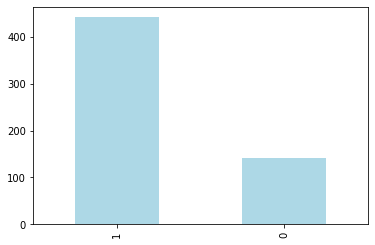

In [8]:
dataset['Gender'].value_counts().plot.bar(color='lightblue')

<div class="alert alert-info" role="alert">
    Menampilkan jumlah pria dan wanita dalam bentuk countplot<br>
    dan dapat dilihat dari grafik diatas jumlah Pria lebih banyak dari jumlah Wanita
</div>

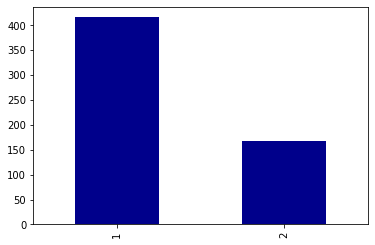

In [9]:
dataset['Dataset'].value_counts().plot.bar(color='darkblue')

<div class="alert alert-info" role="alert">
    Menampilkan kolom <b>Dataset</b> dalam bentuk countplot
</div>

In [10]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<div class="alert alert-info" role="alert">
    Fungsi <i><b>dataset.isnull().sum()</b></i> adalah memmeriksa nilai null pada dataset
    <br>dan dapat dilihat terdapat 4 nilai null pada kolom Albumin_and_Globulin_Ratio
</div>

In [11]:
dataset['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815201

In [12]:
dataset=dataset.fillna(0.94)

<div class="alert alert-info" role="alert">
    Mengisi nilai null dengan memasukkan nilai rata-rata pada kolom tersebut
</div>

In [13]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

<div class="alert alert-info" role="alert">
    Sekarang dataset sudah tidak memiliki nilai null
</div>

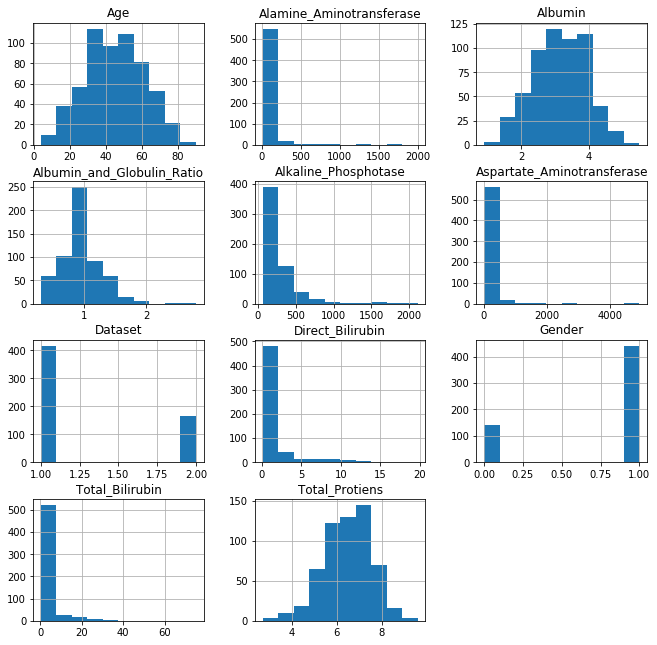

In [14]:
dataset.hist(figsize=(11,11)) 
plt.show() 

<div class="alert alert-info">
<p align="justify">Boxplot berfungsi menampilkan grafis untuk menjelaskan lebih detail distribusi nilai-nilai pada dataset yang digunakan 

In [15]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<div class="alert alert-success" role="alert">
<h3>SET DATA DAN TARGET</h3><br> 
   
</div>

In [16]:
data_raw = dataset.iloc[:,0:10].values
target = dataset.iloc[:,10].values - 1

<div class="alert alert-info">
<p align="justify"> Set data untuk feature yaitu kolom 1 sampai dengan 10, dan kolom 11 sebagai target

In [17]:
dataa=pd.DataFrame(data_raw)
dataa.head()

,0,1,2,3,4,5,6,7,8,9
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40


<div class="alert alert-success" role="alert">
<h3>SCALING</h3><br> 
   
</div>

In [18]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data_raw)

<div class="alert alert-info">
<p align="justify">  Karena dilihat pada persebaran data, agar data tidak memiliki standar deviasi yang tinggi, maka selanjutnya akan discaling, dimana nilai max adalah 1 dan minimal adalah 0t

In [19]:
data_dataframe = pd.DataFrame(data)
data_dataframe.head()

,0,1,2,3,4,5,6,7,8,9
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040


<div class="alert alert-info">
Membuat Variabel data_dataframe hanya untuk menampilkan, selanjutnya variabel data akan tetap dalam bentuk numpy array
</div>

In [20]:
target = keras.utils.to_categorical(target)

<div class="alert alert-success" role="alert">
<h3>SPLITTING</h3><br>    

</div>

In [21]:
data_training, data_testing, target_training, target_testing = train_test_split(data_raw, target, test_size=0.2, random_state=7)

<div class="alert alert-info">
Membagi data secara acak, dengan persentase 80% untuk data latih, 20% untuk data testing. Random state digunakan agar data yang sudah baik, tidak diacak lagi saat spliting, agar persebaran data tidak berubah, yang bisa mempengaruhi learning dari model.
</div>


<div class="alert alert-success" role="alert">
<h3>MODEL</h3><br> 

    
</div>

In [39]:
model = Sequential()
model.add(Dense(100, input_dim=10, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

<div class="alert alert-info">
Menggunakan 1 input layer dengan 10 neuron, 1 hidden layer dengan 100 neuron (fungsi aktivasi relu), dan 1 output layer dengan 1 neuron (fungsi aktivasi softmax).
 
</div>

<div class="alert alert-success" role="alert">
<h3>COMPILE DATA</h3><br> 
   
</div>

In [40]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['acc'])

<div class="alert alert-info">
Menggunakan binary_crossentropy, dan metric Akurasi sebagai parameternya
  
</div>

<div class="alert alert-success" role="alert">
<h3>FIT</h3><br> 
   
</div>

In [41]:
history_validasi = model.fit(data_training,target_training, validation_data=(data_testing,target_testing),batch_size=6, epochs=100)

Train on 466 samples, validate on 117 samples
Epoch 1/100
466/466 [==============================] - 0s 1ms/step - loss: 1.2105 - acc: 0.6545 - val_loss: 1.8956 - val_acc: 0.5983
Epoch 2/100
466/466 [==============================] - 0s 298us/step - loss: 2.8606 - acc: 0.6502 - val_loss: 3.2590 - val_acc: 0.6923
Epoch 3/100
466/466 [==============================] - 0s 304us/step - loss: 2.1083 - acc: 0.6663 - val_loss: 1.4745 - val_acc: 0.6923
Epoch 4/100
466/466 [==============================] - 0s 297us/step - loss: 0.8019 - acc: 0.6749 - val_loss: 0.6529 - val_acc: 0.7051
Epoch 5/100
466/466 [==============================] - 0s 306us/step - loss: 0.9658 - acc: 0.6674 - val_loss: 1.7443 - val_acc: 0.6795
Epoch 6/100
466/466 [==============================] - 0s 302us/step - loss: 0.8317 - acc: 0.6781 - val_loss: 0.7896 - val_acc: 0.6410
Epoch 7/100
466/466 [==============================] - 0s 300us/step - loss: 0.6895 - acc: 0.6931 - val_loss: 1.4882 - val_acc: 0.6923
Epoch 8/100

<div class="alert alert-info">
Proses training model. Disini akan dilakukan training model dimana JST akan melakukan learning berdasarkan data yang di latih yaitu <b>data_training</b> (feature) dan <b>target_training</b> (target). Disini juga dilakukan validasi dengan data yang uji, ditampung pada variabel <b>data_testing</b> (feature) dan <b>target_testing</b> (target). Guna dilakukan FIT adalah agar setiap epochnya dapat ditampung dalam variabel <b>history_validasi</b>, sehingga bisa diplot perubahannya.
   
</div>


<div class="alert alert-success" role="alert">
<h3>PERHITUNGAN AKURASI</h3><br> 
   
</div>

In [42]:
scores = model.evaluate(data_testing, target_testing)
print("Akurasi data Testing = %.2f%%" % (scores[1]*100))

117/117 [==============================] - 0s 51us/step
Akurasi data Testing = 71.79%


<div class="alert alert-info">
Evaluasi dengan mencari skor data testing atau akurasi data testing. Nilai evaluasi disimpan pada variabel <b>scores</b>.
 
</div>


<div class="alert alert-success" role="alert">
<h3>PLOT AKURASI</h3><br> 
   
</div>

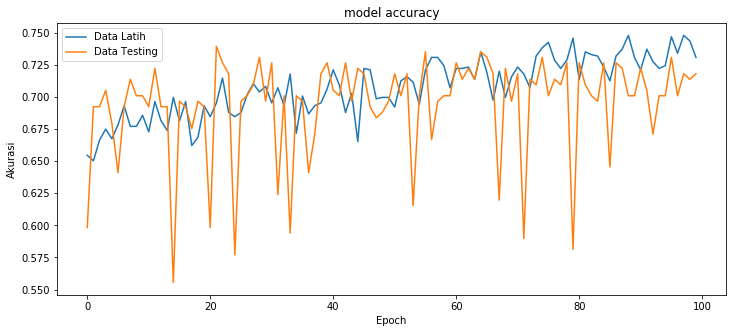

In [43]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
plt.plot(history_validasi.history['acc'])
plt.plot(history_validasi.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

<div class="alert alert-info">
Evaluasi akurasi yang menunjukan perbandingan dari hasil learning pada data uji dan data latih 
</div>


<div class="alert alert-success" role="alert">
<h3>PLOT LOSS</h3><br> 
   
</div>

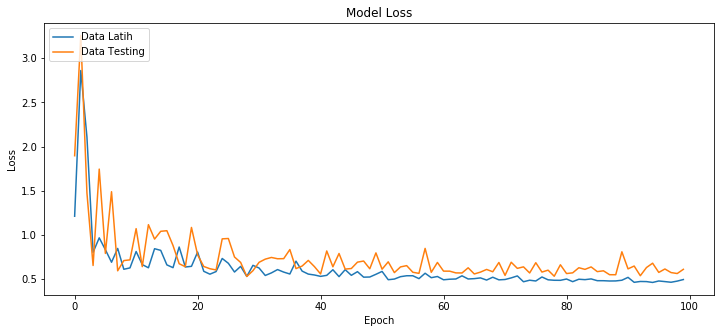

In [44]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
plt.plot(history_validasi.history['loss'])
plt.plot(history_validasi.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

<div class="alert alert-info">
Evaluasi loss/error yang menunjukan perbandingan dari hasil learning pada data uji dan data latih
</div>


<div class="alert alert-success" role="alert">
<h3>CONFUSSION MATRIX</h3><br> 
   
</div>

<html>
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT31xIFNykQIIcCgs_m5BlhqeGw_JfGj51yMvsk9qSN9DxrbV5N" width="300">
    <img>
    </html>

<div class="alert alert-warning">
   <br> <b>True Positives (TP)</b> adalah jumlah record data positif yang diklasifikasikan sebagai
nilai positif
<br><b>False Positives (FP)</b> adalah jumlah record data positif yang diklasifikasikan
sebagai nilai negatif
<br><b>False Negatives (FN)</b> adalah jumlah record data positif yang diklasifikasikan
sebagai nilai positif
<br><b>True Negatives (TN)</b> adalah jumlah record data negatif yang diklasifikasikan
sebagai nilai negatif
</div>



<div class="alert alert-info">
Confusion matrix adalah suatu metode yang biasanya digunakan untuk
melakukan perhitungan akurasi pada konsep data mining.Confusion matrix
digambarkan dengan tabel yang menyatakan jumlah data uji yang benar
diklasifikasikan dan jumlah data uji yang salah diklasifikasikan.

</div>

In [45]:
from sklearn.metrics import confusion_matrix
target_real = np.argmax(target_testing,axis=1)
prediction = model.predict_classes(data_testing)
cm = confusion_matrix(target_real, prediction)
print(cm)

[[80  1]
 [32  4]]


In [46]:
print(target_real)
print(prediction)

[0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 1]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [47]:
tp = cm[0,0]
tn = cm[1,1]
fp = cm[1,0]
fn = cm[0,1]


<div class="alert alert-danger" role="alert">
<h3>PRECISION</h3><br> 
   Presisi adalah rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif.<br><br>

\begin{split}Precision = \frac{TP} {TP+FP}\end{split}
</div>

In [48]:
precision = tp / ( tp + fp)
print ("precesion : ",precision)

precesion :  0.7142857142857143



<div class="alert alert-danger" role="alert">
<h3>RECALL</h3><br> 
   Recall (Sensitifitas) adalah rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.<br><br>

\begin{split}Recall = \frac{TP} {TP+FN}\end{split}
</div>

In [49]:
recall = tp/(tp+fn)
print("recall : ",recall)

recall :  0.9876543209876543


<div class="alert alert-danger" role="alert">
<h3>F1</h3><br> 
F1 Score adalah perbandingan rata-rata presisi dan recall yang dibobotkan.<br><br>

\begin{split}F1 Score = \frac {2 \times Recall \times Precision} {Recall + Precision}\end{split}
</div>

In [50]:
f1=(2*precision*recall)/ (precision+recall)
print ("F1 : ",f1)

F1 :  0.8290155440414507


<div class="alert alert-danger" role="alert">
<h3>AKURASI</h3><br> 
Akurasi adalah rasio prediksi Benar (positif dan negatif) dengan keseluruhan data.<br><br>

\begin{split}Akurasi = \frac{TP+TN} {TP+FP+FN+TN}\end{split}
</div>


In [51]:
akurasi = (tp+tn)/(tp+tn+fp+fn)
print("akurasi : ",akurasi)

akurasi :  0.717948717948718


<div class="alert alert-danger" role="alert">
<h3>SPECIFICITY</h3><br> 
Specificity adalah kebenaran memprediksi negatif dibandingkan dengan keseluruhan data negatif.<br><br>

\begin{split}Specificity = \frac{TN} {TN+FP}\end{split}
</div>


In [52]:
spec = tn / (tn+fp)
print("spec : ",spec)

spec :  0.1111111111111111


<div class="alert alert-danger" role="alert">
<h3>SENSITIVITY</h3><br> 
Specificity adalah kebenaran memprediksi positif dibandingkan dengan keseluruhan data positif.<br><br>

\begin{split}Specificity = \frac{TP} {TP+FN}\end{split}
</div>


In [53]:
Sensitivity = tp/(tp + fn)
print("sensitivity : ",Sensitivity )

sensitivity :  0.9876543209876543


In [54]:
from sklearn.metrics import classification_report
print(classification_report(target_real,prediction))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83        81
           1       0.80      0.11      0.20        36

    accuracy                           0.72       117
   macro avg       0.76      0.55      0.51       117
weighted avg       0.74      0.72      0.63       117



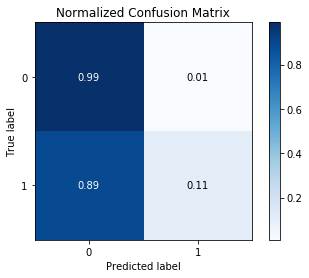

In [55]:
skplt.metrics.plot_confusion_matrix(target_real, prediction, normalize=True)